In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # 안씀
from tensorflow.keras.models import Sequential # 딥러닝 모델 구조
from tensorflow.keras.layers import Dense #완전연결
from tensorflow.keras.optimizers import Adam # 최적화 알고리즘
from sklearn.metrics import classification_report, confusion_matrix # 성능평가

In [48]:
df = pd.read_csv("C:/Users/user/Desktop/가천대/3학년 1학기/인공지능개론/breast_cancer.csv", index_col=0) #첫 번째 열 인덱스로 
print(df.shape)
print(df['label'].value_counts())  # 'label' 컬럼 값 종류

(569, 31)
label
1    357
0    212
Name: count, dtype: int64


In [49]:
df = df.dropna()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [50]:
X = df.drop('label', axis=1) #outcome = ['label']
y = df['label']

In [51]:
Y = pd.get_dummies(y).values  # y를 원핫 인코딩

X = X.values  #넘파이

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 20% 만

In [53]:
model = Sequential()

model.add(Dense(10, input_shape=(30,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.summary()

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 466 (1.82 KB)

 Trainable params: 466 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# 최적화: Adam, 손실함수 : binary, 평가: accuracy

In [55]:
#learning

model_history = model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3817 - loss: 14.4708 - val_accuracy: 0.4123 - val_loss: 8.1666
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3700 - loss: 8.1148 - val_accuracy: 0.5175 - val_loss: 3.2165
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4487 - loss: 2.7440 - val_accuracy: 0.6754 - val_loss: 1.3013
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6967 - loss: 1.3105 - val_accuracy: 0.6579 - val_loss: 1.1591
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7165 - loss: 1.0788 - val_accuracy: 0.6754 - val_loss: 0.8253
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7390 - loss: 0.7561 - val_accuracy: 0.7193 - val_loss: 0.7127
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7767 - loss: 0.6675 - val_accuracy: 0.7895 - val_loss: 0.6356
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7983 - loss: 0.6355 - val_accuracy: 0.7982 - val_loss: 0.6140
Epoch 

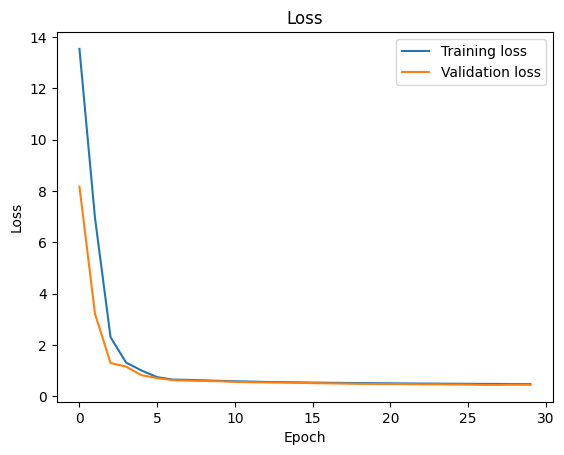

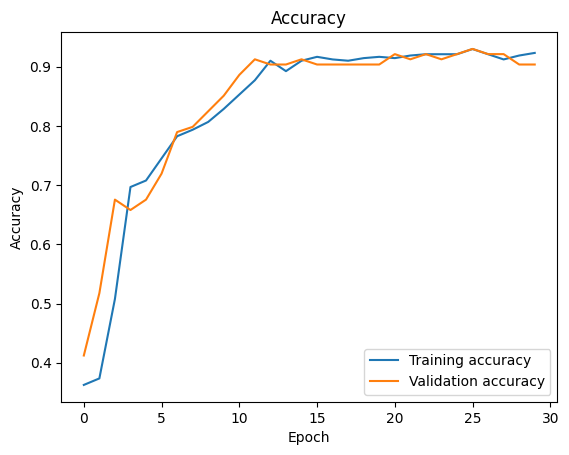

In [58]:
#Loss graph
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Loss graph
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
#예측
Y_pred = model.predict(X_test)

#인코딩
Y_test_class = np.argmax(Y_test, axis=1)

#class num
Y_pred_class = np.argmax(Y_pred, axis=1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [60]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test_class, Y_pred_class))

print(confusion_matrix(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        47
           1       0.90      0.94      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

[[40  7]
 [ 4 63]]
